**写在前面**：本节内容是 [Datawhale三月的组队学习 - 集成学习（上）- CH2-机器学习基础模型回顾 -【Task5 掌握基本的分类模型】](https://github.com/datawhalechina/team-learning-data-mining/blob/master/EnsembleLearning/CH2-%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80%E6%A8%A1%E5%9E%8B%E5%9B%9E%E9%A1%BE/%E7%AC%AC%E4%BA%8C%E7%AB%A0%EF%BC%9A%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%9F%BA%E7%A1%80.ipynb) 的学习笔记，对应notebook的2.2(1),(2),(3)节，学习周期3天

## 导入库和数据

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR # 由前面的测试可以发现，默认参数的SVR的回归效果最差，这里通过学习对其进行超参数调参
from sklearn import datasets
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler # 标准化
from sklearn.pipeline import Pipeline
# Day1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA# LDA线性判别分析
from sklearn.naive_bayes import GaussianNB # 朴素贝叶斯
# Day2
from sklearn.tree import DecisionTreeClassifier # 决策树
from sklearn import tree
import pydotplus # 决策树绘图
import os
os.environ["PATH"] += os.pathsep + 'D:/一些工具/Graphviz/bin/'
from IPython.display import Image 
from sklearn.svm import LinearSVC
# Day3
from sklearn.svm import SVC

In [53]:
# breast_cancer数据集作为本笔记的二分类实验数据
cancer = datasets.load_breast_cancer()
Xbc = StandardScaler().fit_transform(cancer.data)
ybc = cancer.target

Xbc_train, Xbc_test, ybc_train, ybc_test = train_test_split(Xbc,ybc,test_size=0.25) # 数据切分

In [61]:
# iris数据集作为本笔记的多分类实验数据
iris = datasets.load_iris()
Xi = StandardScaler().fit_transform(iris.data)
yi = iris.target

Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi,yi,test_size=0.25) # 数据切分

In [62]:
# 决策树作为本笔记的实验模型
ctree = DecisionTreeClassifier()
# 二分类
ctree.fit(Xbc_train, ybc_train)
ybc_pred = ctree.predict(Xbc_test)
# 多分类
ctree.fit(Xi_train, yi_train)
yi_pred = ctree.predict(Xi_test)

## Day1

### 分类模型指标
**参考资料**：
- [多分类模型Accuracy, Precision, Recall和F1-score的超级无敌深入探讨](https://zhuanlan.zhihu.com/p/147663370)
- 《机器学习》- 周志华
- [【机器学习】多分类任务的性能评价——宏平均和微平均](https://blog.csdn.net/weixin_42864175/article/details/90521758)
- [南瓜书PumpkinBook-chapter2-2.20](https://datawhalechina.github.io/pumpkin-book/#/)

#### 精度 accuracy
$$ACC = \frac{TP+TN}{FP+FN+TP+TN}$$
`精度`（accuracy）指分类正确的样本数占总样本的比例。  
另外，`精度`对应的是`错误率`：$E = \frac{FP+FN}{FP+FN+TP+TN}$，即$E = 1 - ACC$  
`精度`是分类问题中最常用的指标，它计算了分类正确的预测数与总预测数的比值。但是，对于不平衡数据集而言，`精度`并不是一个好指标。

In [63]:
accuracy_score(ybc_test, ybc_pred)

0.916083916083916

#### 准确率 precision 和召回率 recall
**定义**：  
$$PRE = \frac{TP}{TP+FP}$$
`准确率`（precision）指预测为正且分类正确的样本占**预测值为正**的比例。注：`准确率`亦称`查准率`。  
$$REC =  \frac{TP}{TP+FN}$$
`召回率`（recall）指预测为正且分类正确的样本占**类别为正**的比例。注：`召回率`亦称`查全率`。  
**区别**：  
`准确率`着重评估在预测为Positive的所有数据中，真实Positve的数据到底占多少。  
`召回率`着重评估在所有的Positive数据中，到底有多少数据被成功预测为Positive。  
并且一般来说两者不可得兼，想要提高其中一个，势必会降低另一个。

In [57]:
print('PRE:',precision_score(ybc_test, ybc_pred))
print('REC:',recall_score(ybc_test, ybc_pred))

PRE: 0.967741935483871
REC: 0.9375


#### F1值
$$F1 = 2\times\frac{PRE\times REC}{PRE + REC}$$
`F1值`是基于PRE和REC的调和平均数定义的，即：$\frac{1}{F1} = \frac{1}{2}\times(\frac{1}{PRE}+\frac{1}{REC})$

In [58]:
f1_score(ybc_test, ybc_pred)

0.9523809523809523

#### 多分类情况下的ACC，PRE，REC，F1
![./Image/multi-classification.png](./Image/multi-classification.png)
而对于总体评估，分为：`Macro-average`，`Weighted-average`，`Micro-average`
- `Macro-average`:  
    直接将不同类别的评估指标（Precision/ Recall/ F1-score）加起来求平均。该方法能够平等看待每个类别，但是它的值会受稀有类别影响。
    $$Macro-PRE = \frac{PRE_A + PRE_B + PRE_C + PRE_D + PRE_E}{5}$$
    $$Macro-REC = \frac{REC_A + REC_B + REC_C + REC_D + REC_E}{5}$$
    $$Macro-F1 = 2\times\frac{Macro-PRE\times Macro-REC}{Macro-PRE + Macro-REC}$$
- `Weighted-average`:  
    该方法给不同类别不同权重（权重根据该类别的真实分布比例确定），每个类别乘权重后再进行相加。该方法考虑了类别不平衡情况，它的值更容易受到常见类（majority class）的影响。  
    定义$W_A : W_B : W_C : W_D : W_E = N_A : N_B : N_C : N_D : N_E$ (W代表权重，N代表样本在该类别下的真实数目)
    $$Weighted-PRE = PRE_A\times W_A + PRE_B\times W_B + PRE_C\times W_C + PRE_D\times W_D + PRE_E\times W_E $$
    $$Weighted-REC = REC_A\times W_A + REC_B\times W_B + REC_C\times W_C + REC_D\times W_D + REC_E\times W_E $$
    $$Weighted-F1 = 2\times\frac{Weighted-PRE\times Weighted-REC}{Weighted-PRE + Weighted-REC}$$
- `Micro-average`:  
    该方法把每个类别的TP, FP, FN先相加之后，在根据二分类的公式进行计算。  
    定义$TP = TP_A + TP_B + TP_C + TP_D + TP_E$, $FP = FP_A + FP_B + FP_C + FP_D + FP_E$
    $$Micro-PRE = \frac{TP}{TP+FP}$$
    $$Micro-REC = \frac{TP}{TP+FN}$$
    $$Micro-F1 = 2\times\frac{Micro-PRE\times Micro-REC}{Micro-PRE + Micro-REC}$$
    如果测试就可以发现：$Micro-PRE = Micro-REC = Micro-F1 = ACC$.因为在某一类中的False Positive样本，一定是其他某类别的False Negative样本。
- 对比：  
    - 如何每个class的样本数量相差不大，那么Macro和Micro差异也不大
    - 如果每个class的相差较大并且你想：
        - 更注重样本量多的class：使用Micro
        - 更注重样本量少的class：使用Macro
    - 如果Micro远低于Macro，则应该去检查样本量多的class
    - 如果Macro远低于Micro，则应该去检查样本量少的class

In [64]:
print('############## Macro ##############')
print('Macro-PRE:\t',precision_score(yi_test, yi_pred, average='macro'))
print('Macro-REC:\t',recall_score(yi_test, yi_pred, average='macro'))
print('Macro-F1:\t',f1_score(yi_test, yi_pred, average='macro'))
print('############# Weighted ############')
print('Weighted-PRE:\t',precision_score(yi_test, yi_pred, average='weighted'))
print('Weighted-REC:\t',recall_score(yi_test, yi_pred, average='weighted'))
print('Weighted-F1:\t',f1_score(yi_test, yi_pred, average='weighted'))
print('############## Micro ##############')
print('Micro-PRE:\t',precision_score(yi_test, yi_pred, average='micro'))
print('Micro-REC:\t',recall_score(yi_test, yi_pred, average='micro'))
print('Micro-F1:\t',f1_score(yi_test, yi_pred, average='micro'))

############## Macro ##############
Macro-PRE:	 0.8777777777777778
Macro-REC:	 0.8754578754578755
Macro-F1:	 0.8758620689655173
############# Weighted ############
Weighted-PRE:	 0.8692982456140352
Weighted-REC:	 0.868421052631579
Weighted-F1:	 0.8680580762250455
############## Micro ##############
Micro-PRE:	 0.868421052631579
Micro-REC:	 0.868421052631579
Micro-F1:	 0.868421052631579


#### ROC曲线

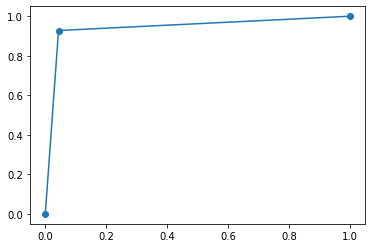

In [49]:
roc = roc_curve(ybc_test, ybc_pred)
plt.plot(roc[0], roc[1], marker='o')
plt.show()

### 逻辑回归
参考资料：
- [【机器学习】逻辑回归的适用场景及优缺点等](https://zhuanlan.zhihu.com/p/54197906)
- [【机器学习】逻辑回归（非常详细）](https://zhuanlan.zhihu.com/p/74874291)(是真的详细。。还没看完)

#### 理论
**适用场景**：  
应用：
- 分类：适合做很多分类算法的基础组件。
- 预测：预测事件发生的概率（输出）。
- 分析：单一因素对某一个事件发生的影响因素分析（特征参数值）。  

适用：
- 基本假设：输出类别服从伯努利二项分布。
- 样本线性可分。
- 特征空间不是很大的情况。
- 不必在意特征间相关性的情景。
- 后续会有大量新数据的情况。

**解决过拟合的方法**:
- 增加数据量（万能办法）
- 减少特征：手动剔除；特征选择算法
- 正则化：结构风险最小化策略
    - 数据稀疏：L1正则化
    - 其他情况：L2正则化
    
**损失函数**:
极小化对数似然的相反数

**优缺点**:  
优点：
- （模型）模型清晰，背后的概率推导经得住推敲。
- （输出）输出值自然地落在0到1之间，并且有概率意义。
- （参数）参数代表每个特征对输出的影响，可解释性强。
- （简单高效）实施简单，非常高效（计算量小、存储占用低），可以在大数据场景中使用。
- （可扩展）可以使用online learning的方式更新轻松更新参数，不需要重新训练整个模型。
- （过拟合）解决过拟合的方法很多，如L1、L2正则化。
- （多重共线性）L2正则化就可以解决多重共线性问题。  

缺点：
- （特征相关情况）因为它本质上是一个线性的分类器，所以处理不好特征之间相关的情况。
- （特征空间）特征空间很大时，性能不好。
- （精度）容易欠拟合，精度不高。

**分布式计算方法**:  
常用优化方法：  
- 随机梯度下降（SGD）
- 批梯度下降（Batch GD）
- 共轭梯度
- 拟牛顿法（LBFGS）
- 交替方向乘子法（ADMM，优化目标+正则项） 

分布式：  
- 梯度的计算可以拆解为分块计算，map-reduce思想


#### 实现

F1: 0.9896907216494846


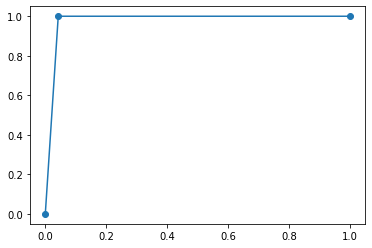

In [81]:
log = LogisticRegression()
log.fit(Xbc_train, ybc_train)
ybc_pred = log.predict(Xbc_test)

print('F1:',f1_score(ybc_test, ybc_pred))
roc = roc_curve(ybc_test, ybc_pred)
plt.plot(roc[0], roc[1], marker='o')
plt.show()

### 线性判别分析
**参考资料**：
- [PCA(主成分分析）和LDA(线性判别分析）的异同处及应用场景](https://blog.csdn.net/weixin_41690708/article/details/97951890)

#### 理论
我是从降维的角度理解的。LDA的核心思想就是设法将数据投影到一条直线上，并且使得同类尽可能*接近*，异类尽可能*远离*。而度量同类是否*接近*的指标为`该类投影点的每一点与该类均值点的协方差之和`，度量异类是否*远离*的指标为`每一类均值点的投影的距离`。（语言表达的不太好，但意思应该表达没差。具体可见《机器学习》-周志华p61）  
另外，LDA和PCA相似：  
- 相同点：
    - PCA和LDA都是经典的降维算法；
    - PCA和LDA都假设数据是符合高斯分布的；
    - PCA和LDA都利用了矩阵特征分解的思想  

- 不同点：
    - PCA是无监督（训练样本无标签）的，LDA是有监督（训练样本有标签）的；
    - PCA是去掉原始数据冗余的维度，LDA是选择一个最佳的投影方向，使得投影后相同类别的数据分布紧凑，不同类别的数据尽量相互远离。
    - LDA最多可以降到k-1维（k是训练样本的类别数量，k-1是因为最后一维的均值可以由前面的k-1维的均值表示）；
    - LDA可能会过拟合数据。

#### 实现

F1: 0.9591836734693877


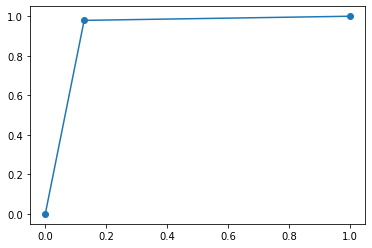

In [80]:
lda = LDA()
lda.fit(Xbc_train, ybc_train)
ybc_pred = lda.predict(Xbc_test)

print('F1:',f1_score(ybc_test, ybc_pred))
roc = roc_curve(ybc_test, ybc_pred)
plt.plot(roc[0], roc[1], marker='o')
plt.show()

## Day2

### 朴素贝叶斯
**参考资料**：
- [带你理解朴素贝叶斯分类算法](https://zhuanlan.zhihu.com/p/26262151)

#### 理论
我对朴素贝叶斯的理解是通过贝叶斯公式将条件概率转化为连乘的形式。而“朴素”体现在对条件概率分布做了条件独立性的假设（这样就不需要在整个特征空间内寻找了，而且往往会有大量的稀疏数据）
  
**优点**:
- 算法逻辑简单,易于实现
- 分类过程中时空开销小

**缺点**：    
理论上，朴素贝叶斯模型与其他分类方法相比具有最小的误差率。但是实际上并非总是如此，这是因为朴素贝叶斯模型假设属性之间相互独立，这个假设在实际应用中往往是不成立的，在属性个数比较多或者属性之间相关性较大时，分类效果不好。

#### 实现

F1: 0.9319371727748692


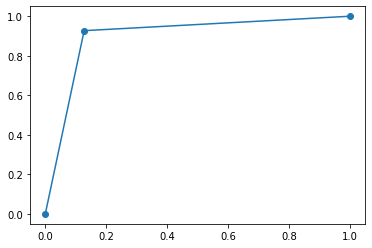

In [82]:
NB = GaussianNB()
NB.fit(Xbc_train, ybc_train)
ybc_pred = NB.predict(Xbc_test)

print('F1:',f1_score(ybc_test, ybc_pred))
roc = roc_curve(ybc_test, ybc_pred)
plt.plot(roc[0], roc[1], marker='o')
plt.show()

### 决策树

#### 理论
决策树的核心就是通过`最优划分`进行节点的选择，最终得到树状结构。不同的算法选择`最优划分`。`最优划分`的指标有：信息增益、信息增益率、基尼指数等。

#### 实现

F1: 0.9361702127659574


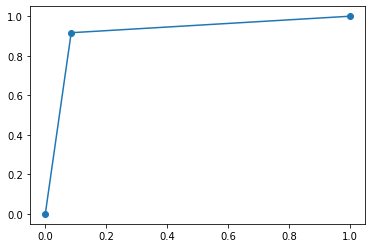

In [94]:
ctree = DecisionTreeClassifier()
ctree.fit(Xbc_train, ybc_train)
ybc_pred = ctree.predict(Xbc_test)

print('F1:',f1_score(ybc_test, ybc_pred))
roc = roc_curve(ybc_test, ybc_pred)
plt.plot(roc[0], roc[1], marker='o')
plt.show()

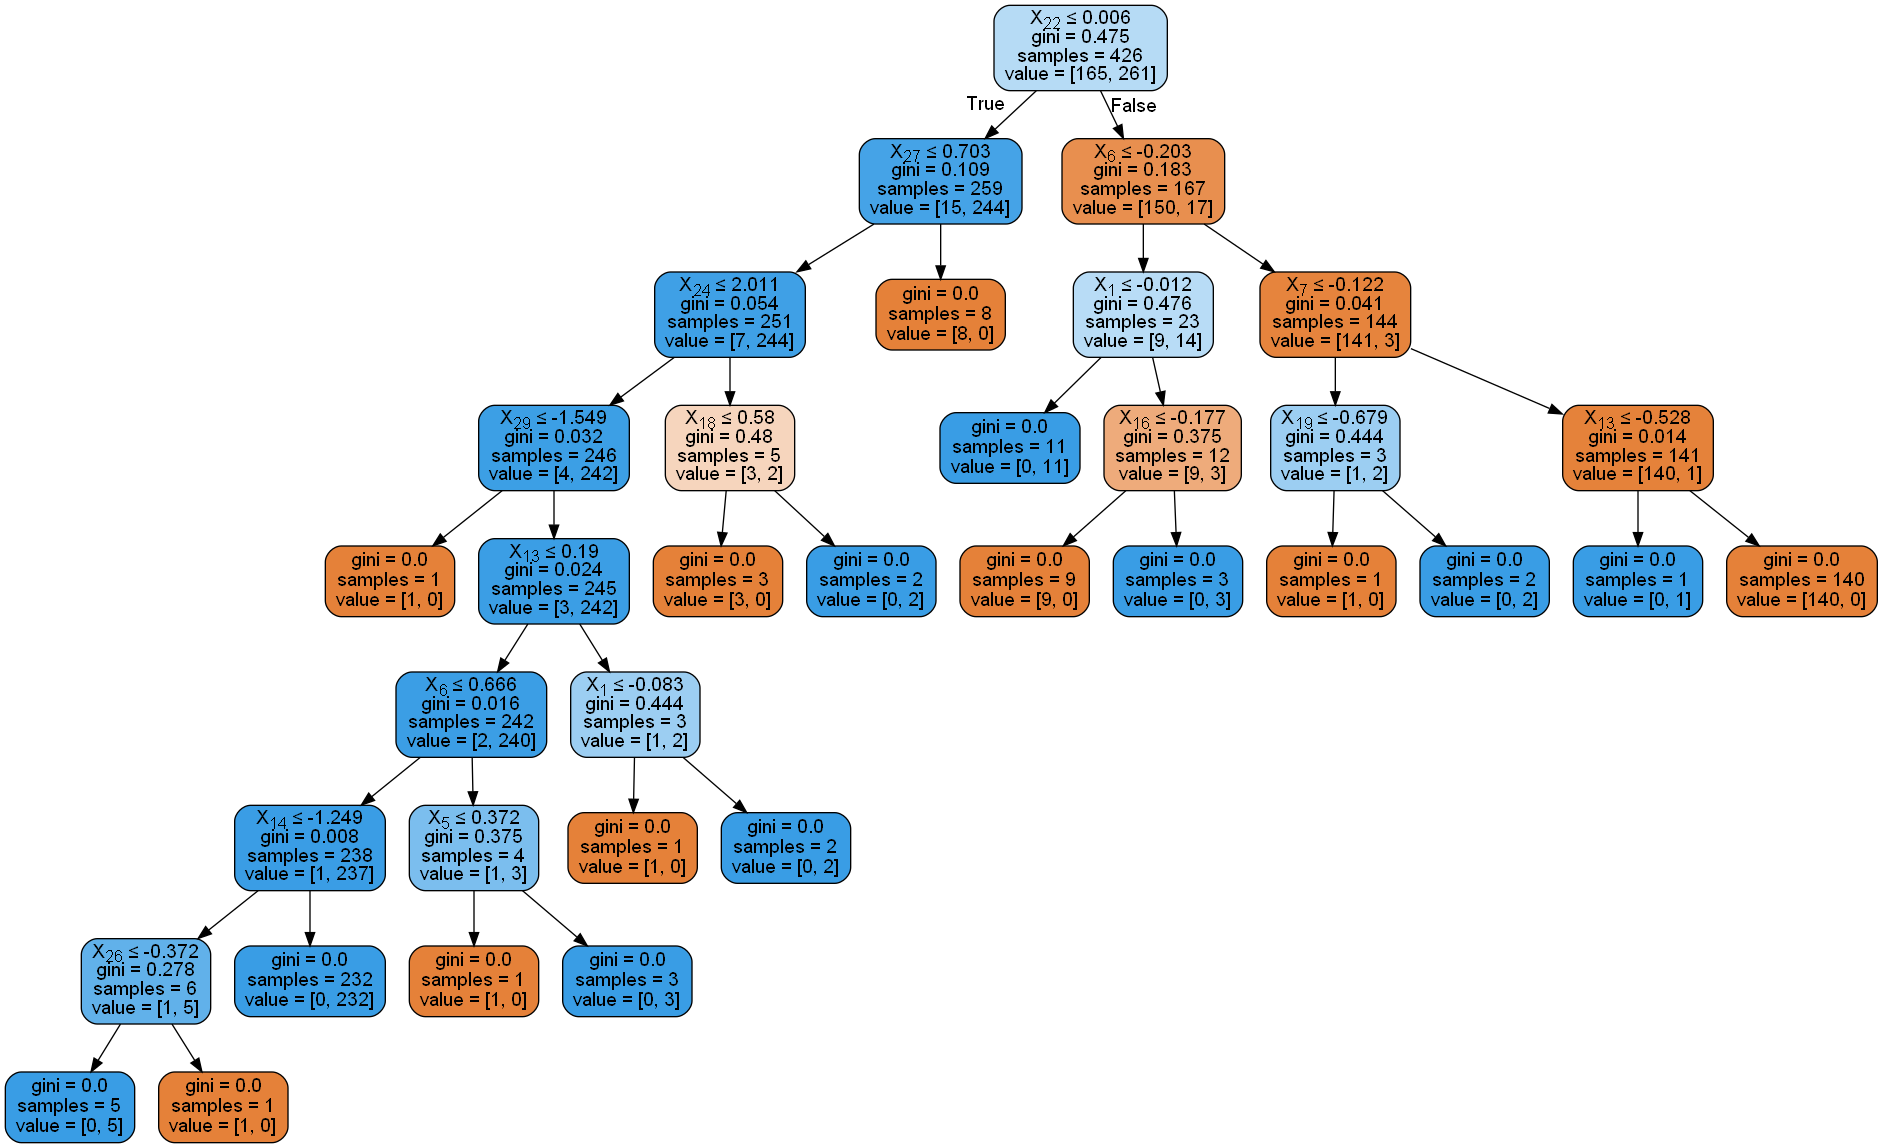

In [104]:
dot_data = tree.export_graphviz(ctree, out_file=None,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png('./Image/ctree_example.png')    #保存图像
Image(graph.create_png()) 

### 支持向量机
**参考资料**：
- [【机器学习】支持向量机 SVM（非常详细）](https://zhuanlan.zhihu.com/p/77750026)

#### 理论
我的理解支持向量机核心在于支持向量，支持向量机通过支持向量进行分类。支持向量指在最大间隔超平面（k维空间的超平面是k-1维）上的数据点，而确定最大间隔是为了模型的鲁棒性最大化，确定最大间隔的方式是选取的超平面之间距离最大。

#### 实现

F1: 0.9354838709677419


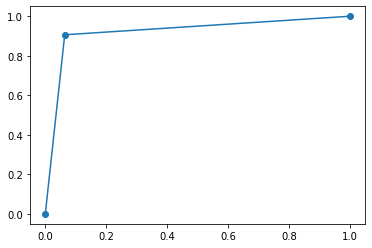

In [87]:
lsvc = LinearSVC()
lsvc.fit(Xbc_train, ybc_train)
y_pred = lsvc.predict(Xbc_test)

print('F1:',f1_score(ybc_test, ybc_pred))
roc = roc_curve(ybc_test, ybc_pred)
plt.plot(roc[0], roc[1], marker='o')
plt.show()

## Day3

### 非线性支持向量机

#### 理论
现实情况中，常常是线性不可分的情况，而上面的支持向量机的条件是“在当前空间内能找到最优分隔超平面”，所以对于线性不可分的情况，有两种方式进行处理：升维和使用核函数。
1. 升维：升维可以解决当前空间线性不可分的问题，但代价是很可能会维度爆炸
2. 使用核函数：核函数的原理暂时不是很清楚，但是可以明确的一点是引入核函数能够在当前维度下实现非线性区分的效果

#### 实现

F1: 0.9354838709677419


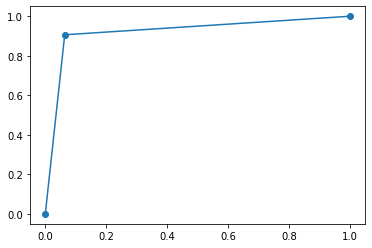

In [93]:
svc = SVC()
svc.fit(Xbc_train, ybc_train)
y_pred = svc.predict(Xbc_test)

print('F1:',f1_score(ybc_test, ybc_pred))
roc = roc_curve(ybc_test, ybc_pred)
plt.plot(roc[0], roc[1], marker='o')
plt.show()

### 支持向量机的核函数
- 多项式核函数
$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\left(\left\langle\mathbf{x}_{i}, \mathbf{x}_{j}\right\rangle+c\right)^{d}
$$   
- 高斯核函数
$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\exp \left(-\frac{\left\|\mathbf{x}_{i}-\mathbf{x}_{j}\right\|_{2}^{2}}{2 \sigma^{2}}\right)
$$  
- Sigmoid核函数
$$
K\left(\mathbf{x}_{i}, \mathbf{x}_{j}\right)=\tanh \left(\alpha \mathbf{x}_{i}^{\top} \mathbf{x}_{j}+c\right)
$$    

In [106]:
# 多项式核函数poly
svc = SVC(kernel='poly')
svc.fit(Xbc_train, ybc_train)
y_pred = svc.predict(Xbc_test)

print('F1:',f1_score(ybc_test, ybc_pred))

F1: 0.9361702127659574


In [107]:
# 高斯核函数rbf
svc = SVC(kernel='rbf')
svc.fit(Xbc_train, ybc_train)
y_pred = svc.predict(Xbc_test)

print('F1:',f1_score(ybc_test, ybc_pred))

F1: 0.9361702127659574


In [109]:
# Sigmoid核函数sigmiod
svc = SVC(kernel='sigmoid')
svc.fit(Xbc_train, ybc_train)
y_pred = svc.predict(Xbc_test)

print('F1:',f1_score(ybc_test, ybc_pred))

F1: 0.9361702127659574
